In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**1. caricare i quartieri in un geodataframe**


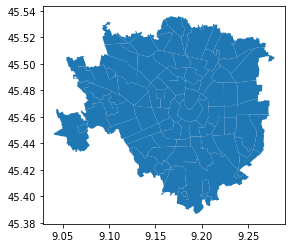

In [ ]:
quartieri = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf")
quartieri.plot()

**2. visualizzare l'intestazione**

In [ ]:
quartieri.head(0)

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry


**3. visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico**

In [ ]:
totquart = quartieri.sort_values(by=['NIL'],inplace= True)
totquart

**4. visualizzare tutti i quartieri su una mappa di Milano**

In [ ]:
!pip install contextily

In [ ]:
import contextily as ctx

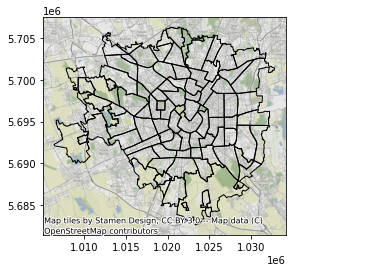

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(edgecolor = 'k',color ='none')
ctx.add_basemap(ax)

**5. cercare il quartiere che contiene il Duomo di Milano**

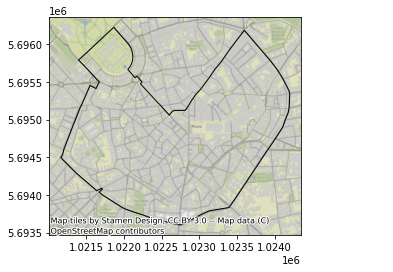

In [ ]:
import contextily as ctx
from shapely.geometry import Point

Duomo_Milano= Point(9.191383,	45.464211)
Duomo = ax = quartieri[quartieri.contains(Duomo_Milano)].to_crs(epsg = 3857).plot(edgecolor = 'k',facecolor = 'None')  #se i epsg sono diversi, convertire quello dei geodataframe utilizzando il .to_crs(epsg = 3857)
ctx.add_basemap(ax)

5 alternativo

In [ ]:
Duomo = quartieri[quartieri.contains(Duomo_Milano)]


**6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene**

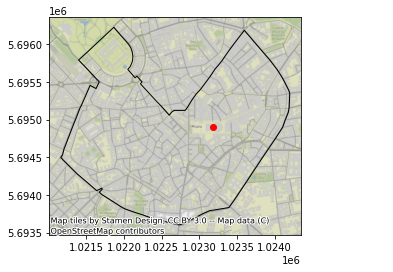

In [ ]:
ax = quartieri[quartieri.contains(Duomo_Milano)].to_crs(epsg = 3857).plot(edgecolor = 'k',facecolor = 'None') 
quartDuomo = geopandas.GeoSeries([Duomo_Milano], crs='EPSG:4326').to_crs(epsg=3857).plot(ax=ax, color='red') 
ctx.add_basemap(ax)

**7. visualizzare i quartieri vicini a quello che contiene il Duomo**

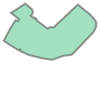

In [ ]:
Dm = Duomo.geometry.squeeze()
Dm

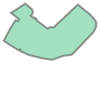

In [ ]:
Area_Duomo = Dm.buffer(0)
Area_Duomo

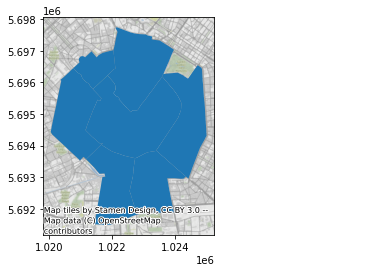

In [ ]:
import contextily as ctx

ax = quartieri[quartieri.intersects(Area_Duomo)].to_crs(epsg = 3857).plot()

ctx.add_basemap(ax)